Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

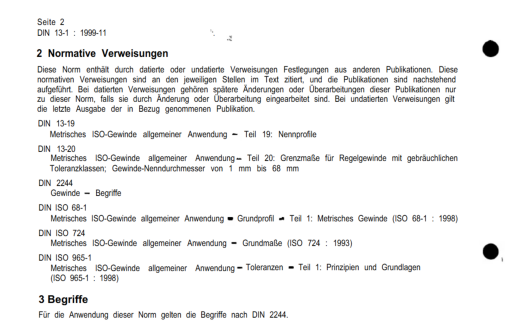

Seite 2 DIN   13-1 1999-11 2 Normative   Verweisungen Diese Norm enthält durch datierte oder undatierte   Verweisungen   Festlegungen aus anderen Publikationen: Diese normativen   Verweisungen sind an den   jeweiligen Stellen   im Text   zitiert und die Publikationen sind nachstehend aufgeführt. Bei   datierten   Verweisungen   gehören   spätere   Änderungen   oder   Überarbeitungen   dieser   Publikationen nur zu   dieser Norm;   falls  sie durch   Änderung   oder   Überarbeitung   eingearbeitet   sind. Bei   undatierten   Verweisungen   gilt die   letzte   Ausgabe der   in  Bezug   genommenen Publikation. DIN 13-19 Metrisches ISO-Gewinde   allgemeiner   Anwendung Teil 19:  Nennprofile DIN 13-20 Metrisches ISO-Gewinde allgemeiner Anwendung Teil 20:  Grenzmaße   für   Regelgewinde mit gebräuchlichen Toleranzklassen; Gewinde-Nenndurchmesser von mm bis 68 mm DIN 2244 Gewinde Begriffe DIN ISO 68-1 Metrisches   ISO-Gewinde   allgemeiner   Anwendung Grundprofil Teil 1: Metrisches   Gewinde 

In [6]:
import easyocr
from PIL import Image
import matplotlib.pyplot as plt

# Cargar imagen escaneada
image_path = "norm_de.png"  # Usa tu imagen escaneada de texto legal
reader = easyocr.Reader(['de', 'en'])  # OCR multilenguaje
results = reader.readtext(image_path)

# Mostrar imagen + resultados
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Texto extraído
ocr_text = " ".join([res[1] for res in results])
print(ocr_text)

In [2]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install easyocr

  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
Using cached easyocr-1.7.2-py3-none-any.whl (2.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 105.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 62.5 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

False
No GPU found


Using CPU. Note: This module is much faster with a GPU.


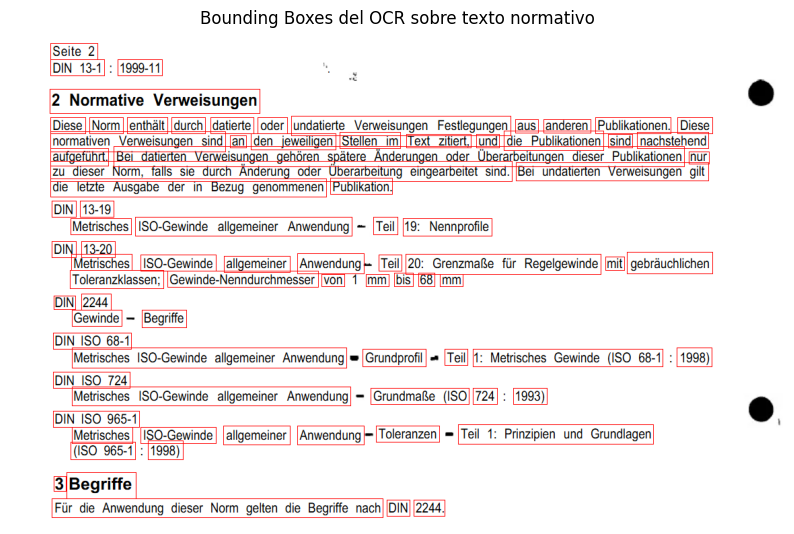

In [4]:
import easyocr
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Ruta al archivo de imagen escaneada (puede provenir de PDF convertido)
image_path = 'norm_de.png'
image = Image.open(image_path)

# Crear el lector OCR para alemán
reader = easyocr.Reader(['de'], gpu=False)

# Aplicar OCR
import numpy as np
results = reader.readtext(np.array(image))

# Dibujar los bounding boxes
draw = ImageDraw.Draw(image)
for (bbox, text, confidence) in results:
    polygon = [tuple(point) for point in bbox]
    draw.polygon(polygon, outline='red')

# Mostrar resultado
plt.figure(figsize=(10, 12))
plt.imshow(image)
plt.axis('off')
plt.title("Bounding Boxes del OCR sobre texto normativo")
plt.show()


In [11]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from PIL import Image

# Cargar imagen
image = Image.open('norm_de.png')

# Opcional: especificar idioma
custom_oem_psm_config = r'--oem 3 --psm 6 -l deu'  # oem=engine mode, psm=page segmentation

# Extraer texto
text_tesseract = pytesseract.image_to_string(image, config=custom_oem_psm_config)

print("📄 Texto con Tesseract:")
print(text_tesseract)


TesseractNotFoundError: C:\Program Files\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.

In [9]:
pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 31.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562584 sha256=563ecce70875c406ba5c63c8ae4e6df290eb5587c0851670c0234b6ac3b322b6
  Stored in directory: /home/codespace/.cache/pip/wheels/13/1f/8e/2d6c0e358fd6d01ca80ecd9185a374bcda35879f4fec727242
Successfully built tesseract
Note: you may need to restart the kernel to use updated packages.
